In [3]:
import networkx as nx
G=nx.Graph()
"""By definition, a Graph is a collection of nodes (vertices) along 
with identified pairs of nodes (called edges, links, etc). 
In NetworkX, nodes can be any hashable object e.g., a text string, 
an image, an XML object, another Graph, a customized node object, etc."""

'By definition, a Graph is a collection of nodes (vertices) along \nwith identified pairs of nodes (called edges, links, etc). \nIn NetworkX, nodes can be any hashable object e.g., a text string, \nan image, an XML object, another Graph, a customized node object, etc.'

In [ ]:
#Nodes
"""The graph G can be grown in several ways. NetworkX includes 
many graph generator functions and facilities to read and write graphs in many formats. """

In [7]:
G.add_node(1)
#nx.draw(G)

In [11]:

G.add_nodes_from([2,3])
#nx.draw(G)
"""add nodes from any iterable container, such as a list"""

'add nodes from any iterable container, such as a list'

In [13]:
G.add_nodes_from([(4,{"color":"red"}), (5,{"color":"green"})])
#nx.draw(G)
"""You can also add nodes along with node attributes if your container yields 2-tuples 
of the form (node, node_attribute_dict)"""

'You can also add nodes along with node attributes if your container yields 2-tuples \nof the form (node, node_attribute_dict)'

'Nodes from one graph can be incorporated into another'

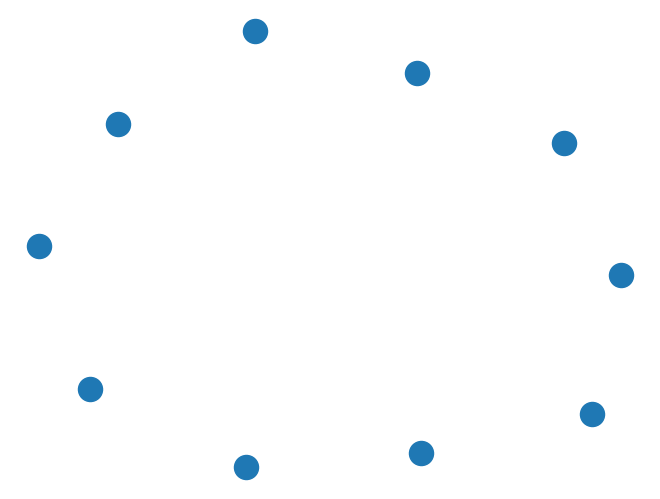

In [15]:
H=nx.path_graph(10)
G.add_nodes_from(H)
nx.draw(G)
"""Nodes from one graph can be incorporated into another"""

In [16]:
"""The graph G now contains H as a node. This flexibility is very powerful as it allows 
graphs of graphs, graphs of files, graphs of functions and much more. It is worth thinking 
about how to structure your application so that the nodes are useful entities. 
Of course you can always use a unique identifier in G 
and have a separate dictionary keyed by identifier to the node information if you prefer."""

'The graph G now contains H as a node. This flexibility is very powerful as it allows \ngraphs of graphs, graphs of files, graphs of functions and much more. It is worth thinking \nabout how to structure your application so that the nodes are useful entities. \nOf course you can always use a unique identifier in G \nand have a separate dictionary keyed by identifier to the node information if you prefer.'

In [19]:
#Edges
G.add_edge(1,2)
e=(2,3)
G.add_edge(*e) #unpack edge tuple
#nx.draw(G)
"""G can also be grown by adding one edge at a time,"""

'G can also be grown by adding one edge at a time,'

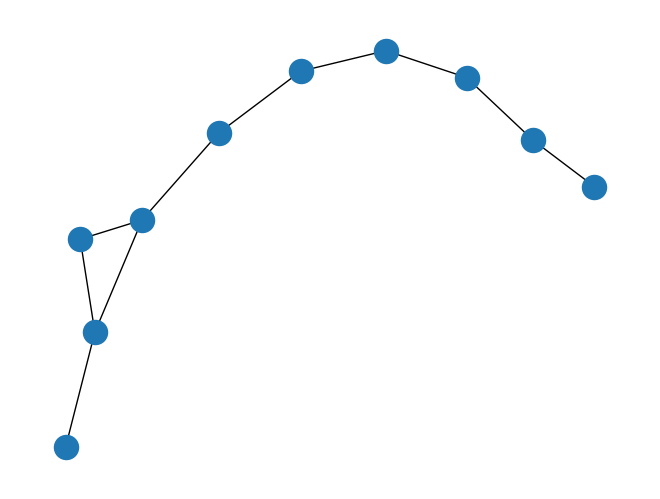

In [22]:
G.add_edges_from([(1,2),(1,3)]) #add edges from a list
G.add_edges_from(H.edges)
nx.draw(G)

In [23]:
G.clear()
"""Removing all edges and all nodes from the graph"""

In [25]:
G.add_nodes_from([(1,2), (1,3)])
G.add_node(1)
G.add_edge(1,2)
G.add_node("spam")
G.add_nodes_from("spam")
G.add_edge(3,'m')

In [29]:
#checking number of nodes and edges
G.number_of_nodes(), G.number_of_edges(), 

(10, 2)

In [30]:
#Note
"""The order of adjacency reporting (e.g., G.adj, G.successors, G.predecessors) is the 
order of edge addition. However, the order of G.edges is the order of the adjacencies 
which includes both the order of the nodes and each node’s adjacencies. See example below:"""

'The order of adjacency reporting (e.g., G.adj, G.successors, G.predecessors) is the \norder of edge addition. However, the order of G.edges is the order of the adjacencies \nwhich includes both the order of the nodes and each node’s adjacencies. See example below:'

In [37]:
DG=nx.DiGraph()
DG.add_edge(2,1)
DG.add_edge(1,3)
DG.add_edge(2,4)
DG.add_edge(1,2)
#nx.draw(DG)
assert list(DG.successors(2))==[1,4]
assert list(DG.edges)==[(2,1),(2,4),(1,3),(1,2)]

In [38]:
#Examining the element of graph
"""We can examine the nodes and edges. Four basic graph properties facilitate reporting: G.nodes, G.edges, G.adj and G.degree. T"""

'We can examine the nodes and edges. Four basic graph properties facilitate reporting: G.nodes, G.edges, G.adj and G.degree. T'

In [39]:
list(G.nodes)

[(1, 2), (1, 3), 1, 2, 'spam', 's', 'p', 'a', 'm', 3]

In [40]:
list(G.edges)

[(1, 2), ('m', 3)]

In [41]:
list(G.adj[1]) #or list(G.neighbors(1))

[2]

In [43]:
G.degree[1]

1

In [44]:
G.edges([2,'m'])

EdgeDataView([(2, 1), ('m', 3)])

In [45]:
G.degree([2,3])

DegreeView({2: 1, 3: 1})

In [46]:
#Remove element from a graph
"""One can remove nodes and edges from the graph in a similar fashion to adding. Use methods Graph.remove_node(), Graph.remove_nodes_from(), Graph.remove_edge() and Graph.remove_edges_from(), """

'One can remove nodes and edges from the graph in a similar fashion to adding. Use methods Graph.remove_node(), Graph.remove_nodes_from(), Graph.remove_edge() and Graph.remove_edges_from(), '

In [47]:
G.remove_node(2)
G.remove_nodes_from("spam")
list(G.nodes)

[(1, 2), (1, 3), 1, 'spam', 3]

In [57]:
G.add_edge(1, 3)

In [58]:
list(G)

[(1, 2), (1, 3), 1, 'spam', 3]

In [59]:
#Using the graph_constructor
"""Graph objects do not have to be built up incrementally - data specifying graph structure can be passed directly to the constructors of the various graph classes. When creating a graph structure by instantiating one of the graph classes you can specify data in several formats"""

'Graph objects do not have to be built up incrementally - data specifying graph structure can be passed directly to the constructors of the various graph classes. When creating a graph structure by instantiating one of the graph classes you can specify data in several formats'

In [60]:
G.add_edge(1,2)

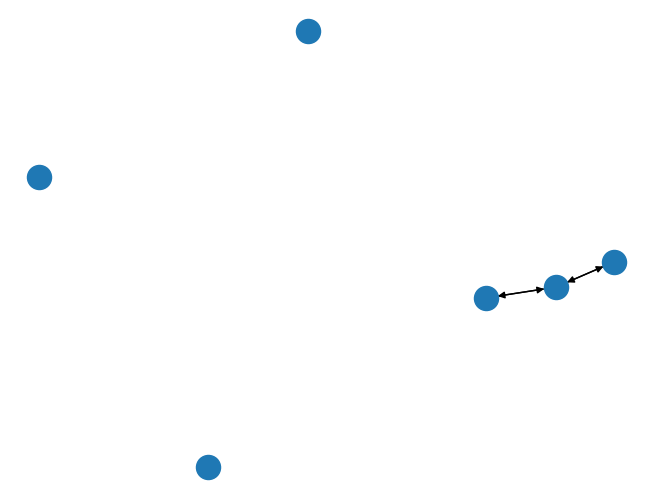

In [63]:
H=nx.DiGraph(G)
list(H.edges())
nx.draw(H)

In [66]:
edgelist=[(0,1), (1,2), (2,3)]
H=nx.Graph(edgelist)
#nx.draw(H)
list(H.edges)

[(0, 1), (1, 2), (2, 3)]

In [69]:
H.clear()
adjacency_dict={0:(1,2), 1:(0,2), 2:(0,1)}
H=nx.Graph(adjacency_dict) #create a graph dict mapping nodes to nbrs
list(H.edges())
#nx.draw(H)

[(0, 1), (0, 2), (1, 2)]

In [70]:
#what to use as nodes and edges
"""You might notice that nodes and edges are not specified as NetworkX objects. This leaves you free to use meaningful items as nodes and edges. The most common choices are numbers or strings, but a node can be any hashable object (except None), and an edge can be associated with any object x using G.add_edge(n1, n2, object=x).

As an example, n1 and n2 could be protein objects from the RCSB Protein Data Bank, and x could refer to an XML record of publications detailing experimental observations of their interaction.

We have found this power quite useful, but its abuse can lead to surprising behavior unless one is familiar with Python. If in doubt, consider using convert_node_labels_to_integers() to obtain a more traditional graph with integer labels.

"""

'You might notice that nodes and edges are not specified as NetworkX objects. This leaves you free to use meaningful items as nodes and edges. The most common choices are numbers or strings, but a node can be any hashable object (except None), and an edge can be associated with any object x using G.add_edge(n1, n2, object=x).\n\nAs an example, n1 and n2 could be protein objects from the RCSB Protein Data Bank, and x could refer to an XML record of publications detailing experimental observations of their interaction.\n\nWe have found this power quite useful, but its abuse can lead to surprising behavior unless one is familiar with Python. If in doubt, consider using convert_node_labels_to_integers() to obtain a more traditional graph with integer labels.\n\n'

In [71]:
#Accessing edges and neighbors
G=nx.Graph([(1,2,{"color":"yellow"})])
G[1]

AtlasView({2: {'color': 'yellow'}})

In [72]:
G[1][2]

{'color': 'yellow'}

In [73]:
"""You can get/set the attributes of an edge using subscript notation if the edge already exists."""

'You can get/set the attributes of an edge using subscript notation if the edge already exists.'

In [75]:
G.add_edge(1,3)
G[1][3]['color']='blue'
G.edges[1,2]['color']='red'
G.edges[1,2]

{'color': 'red'}

In [76]:
G[1][2]

{'color': 'red'}

In [77]:
"""Fast examination of all (node, adjacency) pairs is achieved using G.adjacency(), or G.adj.items(). Note that for undirected graphs, adjacency iteration sees each edge twice."""

'Fast examination of all (node, adjacency) pairs is achieved using G.adjacency(), or G.adj.items(). Note that for undirected graphs, adjacency iteration sees each edge twice.'

In [80]:
FG=nx.Graph()
FG.add_weighted_edges_from([(1,2,0.12), (1, 3, 0.75), (2, 4, 1.2), (3, 4, 0.375)])
#nx.draw(FG)
FG.adj.items()

ItemsView(AdjacencyView({1: {2: {'weight': 0.12}, 3: {'weight': 0.75}}, 2: {1: {'weight': 0.12}, 4: {'weight': 1.2}}, 3: {1: {'weight': 0.75}, 4: {'weight': 0.375}}, 4: {2: {'weight': 1.2}, 3: {'weight': 0.375}}}))

In [79]:
for n, nbrs, in FG.adj.items():
    for nbr, eattr in nbrs.items():
        wt=eattr['weight']
        if wt<0.5:
            print(f"{n}, {nbr}, {wt:.3}")

1, 2, 0.12
2, 1, 0.12
3, 4, 0.375
4, 3, 0.375


In [83]:
#Convenient access to all edges is achieved with the edges property.
x=FG.edges.data('weight')

In [84]:
for (u, v, wt) in x:
    if wt<0.5:
        print(f"{u} {v},{wt:.3}")

1 2,0.12
3 4,0.375


In [85]:
#Adding attributes to graphs, nodes, and edges
"""Attributes such as weights, labels, colors, or whatever Python object you like, can be attached to graphs, nodes, or edges.

Each graph, node, and edge can hold key/value attribute pairs in an associated attribute dictionary (the keys must be hashable). By default these are empty, but attributes can be added or changed using add_edge, add_node or direct manipulation of the attribute dictionaries named G.graph, G.nodes, and G.edges for a graph G."""

'Attributes such as weights, labels, colors, or whatever Python object you like, can be attached to graphs, nodes, or edges.\n\nEach graph, node, and edge can hold key/value attribute pairs in an associated attribute dictionary (the keys must be hashable). By default these are empty, but attributes can be added or changed using add_edge, add_node or direct manipulation of the attribute dictionaries named G.graph, G.nodes, and G.edges for a graph G.'

In [87]:
G.clear()
#Graph Attributes
G=nx.Graph(day='Friday')
G.graph

{'day': 'Friday'}

In [88]:

G.graph['day']='Monday'
G.graph

{'day': 'Monday'}

In [90]:
#Node atributes
G.add_node(1, time='5pm')
G.add_nodes_from([3], time='2pm')
G.nodes[1]

{'time': '5pm'}

In [91]:
G.nodes[1]['room']=714
G.nodes.data()

NodeDataView({1: {'time': '5pm', 'room': 714}, 3: {'time': '2pm'}})

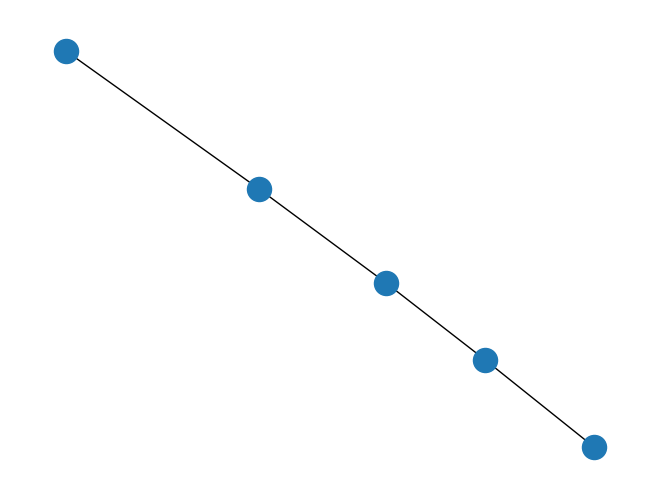

In [93]:
#Edge Attributes
G.add_edge(1,2, weight=4.7)
G.add_edges_from([(3,4), (4,5)], color='red')
G.add_edges_from([(1,2,{'color':'blue'}), (2,3, {'weight':8})])
G[1][2]['weight']=4.7
G.edges[3,4]['weight']=4.2
nx.draw(G)

In [94]:
#Directed Graph
"""The DiGraph class provides additional methods and properties specific to directed edges, e.g., DiGraph.out_edges, DiGraph.in_degree, DiGraph.predecessors(), DiGraph.successors() etc. To allow algorithms to work with both classes easily, the directed versions of neighbors is equivalent to successors while DiGraph.degree reports the sum of DiGraph.in_degree and DiGraph.out_degree even though that may feel inconsistent at times."""

'The DiGraph class provides additional methods and properties specific to directed edges, e.g., DiGraph.out_edges, DiGraph.in_degree, DiGraph.predecessors(), DiGraph.successors() etc. To allow algorithms to work with both classes easily, the directed versions of neighbors is equivalent to successors while DiGraph.degree reports the sum of DiGraph.in_degree and DiGraph.out_degree even though that may feel inconsistent at times.'

In [96]:
DG.clear()
DG=nx.DiGraph()
DG.add_weighted_edges_from([(1, 2, 0.5), (3, 1, 0.75)])
#nx.draw(DG)
DG.out_degree(1, weight='weight')

0.5

In [97]:
DG.degree(1, weight='weight')

1.25

In [98]:
list(DG.successors(1))

[2]

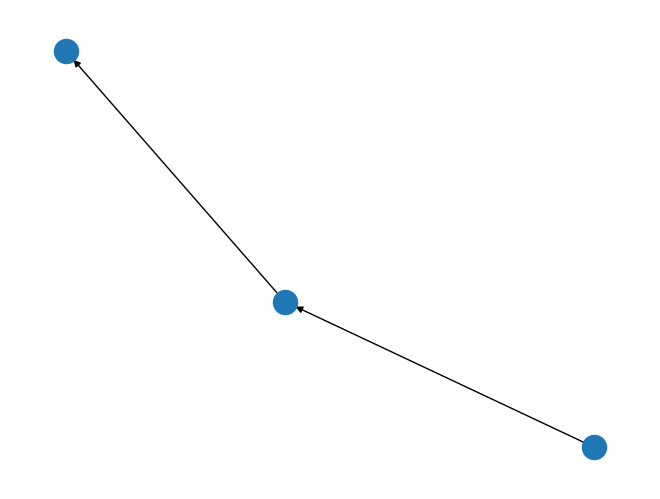

In [100]:
list(DG.neighbors(1))
nx.draw(DG)

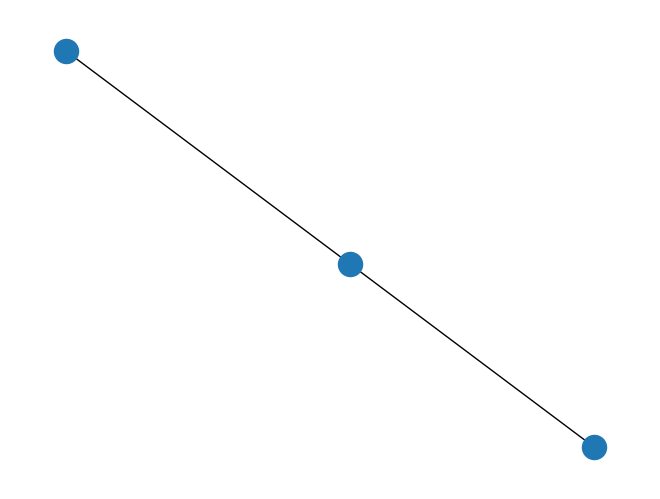

In [101]:
#Directed to undirected graph
H=nx.Graph(DG)
nx.draw(H)

In [102]:
#Multigraph
"""NetworkX provides classes for graphs which allow multiple edges between any pair of nodes. The MultiGraph and MultiDiGraph classes allow you to add the same edge twice, possibly with different edge data. This can be powerful for some applications, but many algorithms are not well defined on such graphs. Where results are well defined, e.g., MultiGraph.degree() we provide the function. Otherwise you should convert to a standard graph in a way that makes the measurement well defined"""

'NetworkX provides classes for graphs which allow multiple edges between any pair of nodes. The MultiGraph and MultiDiGraph classes allow you to add the same edge twice, possibly with different edge data. This can be powerful for some applications, but many algorithms are not well defined on such graphs. Where results are well defined, e.g., MultiGraph.degree() we provide the function. Otherwise you should convert to a standard graph in a way that makes the measurement well defined'

In [104]:
MG=nx.MultiGraph()
MG.add_weighted_edges_from([(1, 2, 0.5), (1, 2, 0.75), (2, 3, 0.5)])
dict(MG.degree(weight='weight'))

{1: 1.25, 2: 1.75, 3: 0.5}

In [106]:
GG=nx.Graph()
for n, nbrs in MG.adjacency():
    for nbr, edict in nbrs.items():
        minvalue=min([d['weight'] for d in edict.values()])
        GG.add_edge(n, nbr, weight=minvalue)
nx.shortest_path(GG,1,3)

[1, 2, 3]

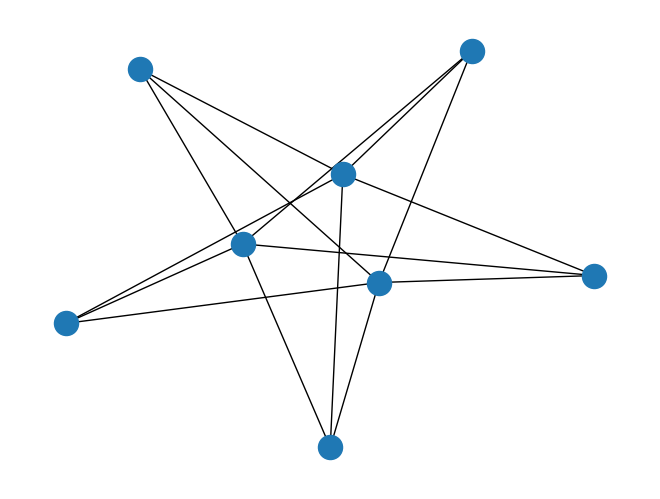

In [108]:
K_5 = nx.complete_graph(5)
K_3_5 = nx.complete_bipartite_graph(3, 5)
barbell = nx.barbell_graph(10, 10)
lollipop = nx.lollipop_graph(10, 20)
nx.draw(K_3_5)

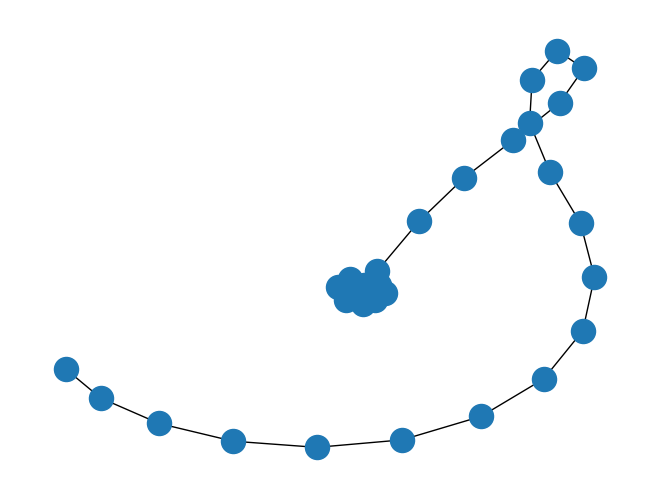

In [110]:
nx.draw(lollipop)

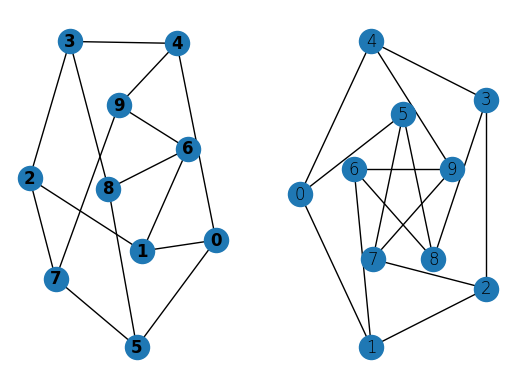

In [112]:
#Drawing graph
import matplotlib.pyplot as plt
G=nx.petersen_graph()
subax1=plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')
subax2=plt.subplot(122)
nx.draw_shell(G, nlist=[range(5,10), range(5)], with_labels=True, font_weight=True)

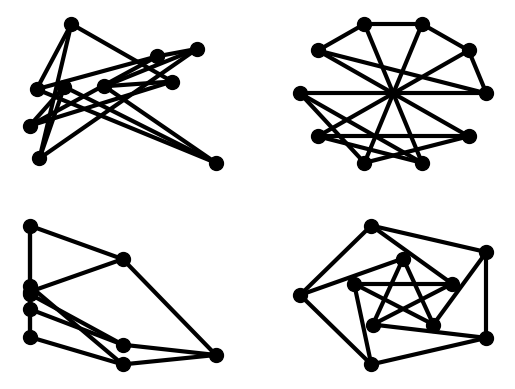

In [113]:
options = {
    'node_color': 'black',
    'node_size': 100,
    'width': 3,
}
subax1 = plt.subplot(221)
nx.draw_random(G, **options)
subax2 = plt.subplot(222)
nx.draw_circular(G, **options)
subax3 = plt.subplot(223)
nx.draw_spectral(G, **options)
subax4 = plt.subplot(224)
nx.draw_shell(G, nlist=[range(5,10), range(5)], **options)

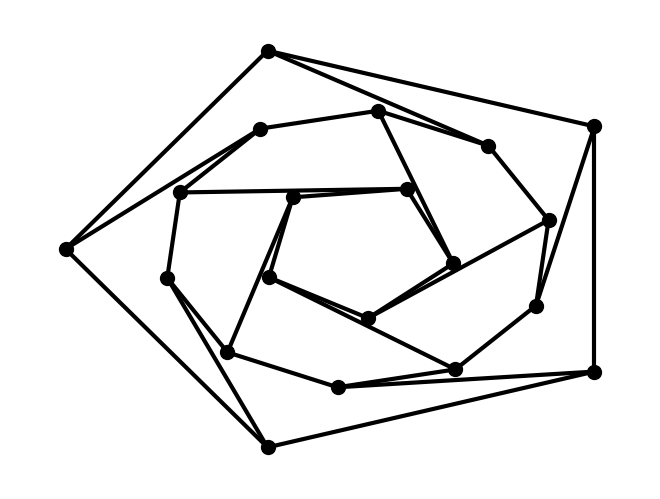

In [115]:
G = nx.dodecahedral_graph()
shells = [[2, 3, 4, 5, 6], [8, 1, 0, 19, 18, 17, 16, 15, 14, 7], [9, 10, 11, 12, 13]]
nx.draw_shell(G, nlist=shells, **options)
plt.savefig("dodec.png")

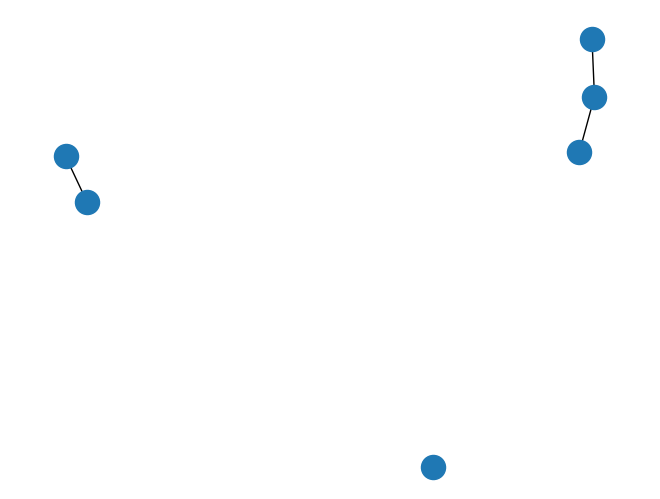

In [116]:
import math
G=nx.Graph()
G.add_edge(1,2)
G.add_edge(2,3, weight=0.9)
G.add_edge('y', 'x', function=math.cos)
G.add_node(math.cos)
nx.draw(G)

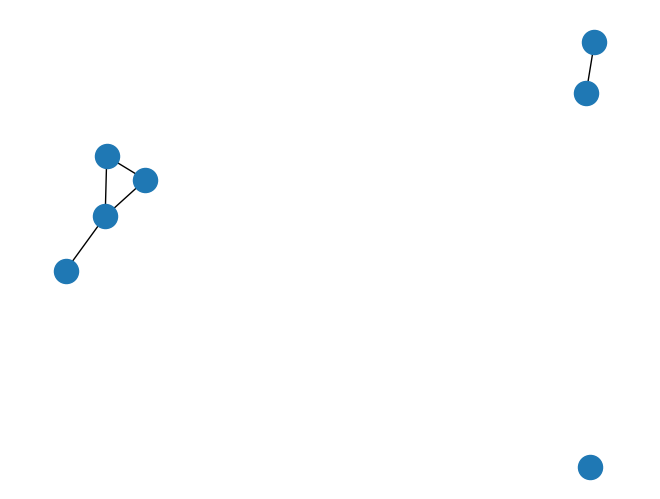

In [117]:
elist = [(1, 2), (2, 3), (1, 4), (4, 2)]
G.add_edges_from(elist)
nx.draw(G)

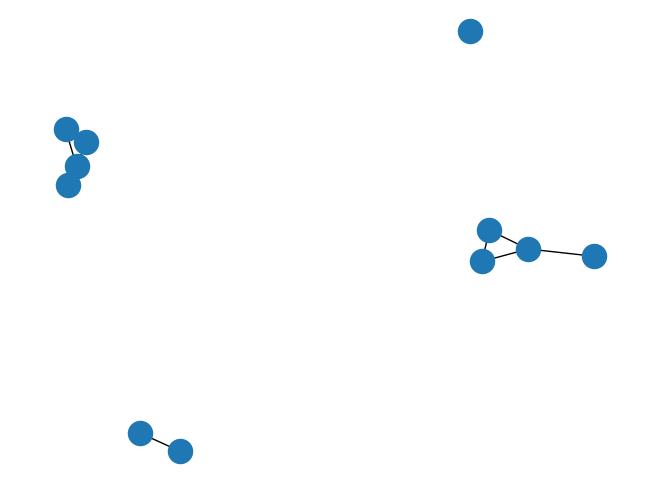

In [118]:
elist = [('a', 'b', 5.0), ('b', 'c', 3.0), ('a', 'c', 1.0), ('c', 'd', 7.3)]
G.add_weighted_edges_from(elist)
nx.draw(G)

In [119]:
G.clear()

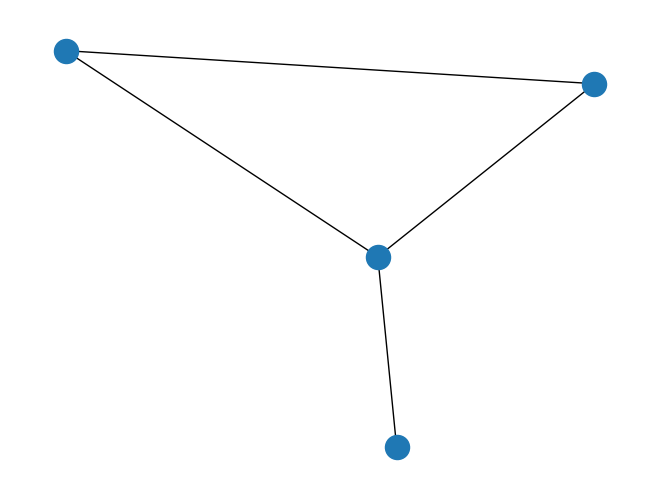

In [120]:
G = nx.Graph()
e = [('a', 'b', 0.3), ('b', 'c', 0.9), ('a', 'c', 0.5), ('c', 'd', 1.2)]
G.add_weighted_edges_from(e)
nx.draw(G)

In [122]:
print(nx.dijkstra_path(G, 'a', 'd'))
G.clear()

['a', 'c', 'd']


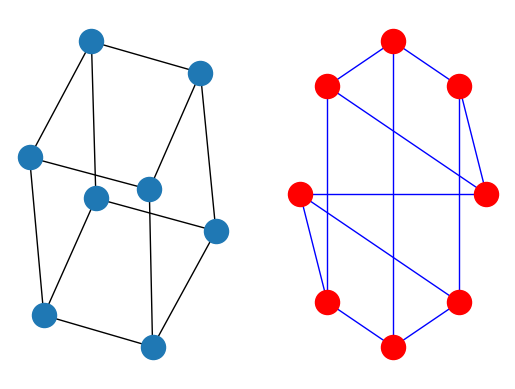

In [124]:
import matplotlib.pyplot as plt
G = nx.cubical_graph()
subax1 = plt.subplot(121)
nx.draw(G) 
subax2 = plt.subplot(122)
nx.draw(G, pos=nx.circular_layout(G), node_color='r', edge_color='b')

In [125]:
#Approximations and Heuristics
from networkx.algorithms import approximation